# Test the validity of all the operators

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib


# Get the parent directory of the current file
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)


# Import all the modules
import solvers
importlib.reload(solvers)
import utils
importlib.reload(utils)
import staggered_grid
importlib.reload(staggered_grid)
import operators
importlib.reload(operators)


<module 'operators' from 'd:\\PhD at UCLA\\Spring 2025\\MAE-250H\\operators.py'>

In [8]:
'''
Create staggered grid for all the operators
'''
Lx = 1
Ly = 1
Nx = 10
Ny = 10
# initial_condition = np.zeros((Nx, Ny))

In [9]:
'''
Initial conditions
'''
def initial_condition_velocity(u_mesh_grid, v_mesh_grid):
    Xu, Yu = u_mesh_grid
    Xv, Yv = v_mesh_grid
    u = np.sin(2 * np.pi * Xu) * np.cos(2 * np.pi * Yu)
    v = np.sin(2 * np.pi * Xv) * np.cos(2 * np.pi * Yv)
    return u, v

def initial_condition_pressure(pressure_mesh_grid):
    Xp, Yp = pressure_mesh_grid
    p = np.ones(Xp.shape) * 3
    return p


In [10]:
my_grid = staggered_grid.StaggeredGrid(Lx, Ly, Nx, Ny, initial_condition_velocity, initial_condition_pressure)
spatial_mesh_grid, pressure_mesh_grid, u_mesh_grid, v_mesh_grid, vorticity_mesh_grid = my_grid.get_grid()
grids = [spatial_mesh_grid, pressure_mesh_grid, u_mesh_grid, v_mesh_grid, vorticity_mesh_grid]

d:\PhD at UCLA\Spring 2025\MAE-250H\staggered_grid.py:155: RuntimeWarning: invalid value encountered in cast
  return pressure_pointer.astype(int)


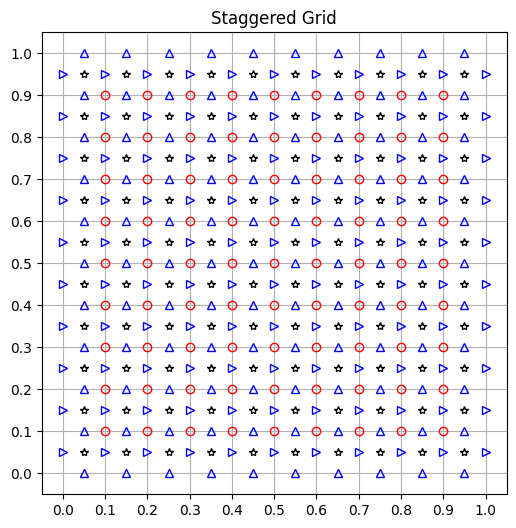

In [11]:
markers = ['P', '*', '>', '^', 'o']
marker_edge_color = ['black', 'black', 'blue', 'blue', 'red']
fig, ax = plt.subplots(figsize=(6, 6))
# Use the spatial mesh grid to plot the grid
X, Y = spatial_mesh_grid

x_ticks = X[0, :]
y_ticks = Y[:, 0]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)



for i in range(1, len(grids)):
    X_plot, Y_plot = grids[i]

    plt.plot(X_plot, Y_plot, markers[i], markerfacecolor='none', markeredgecolor=marker_edge_color[i])

plt.title('Staggered Grid')
plt.grid(axis='both')
# plt.legend(["Pressue Mesh Grid", "u Mesh Grid", "v Mesh Grid", "Vorticity Mesh Grid"])
plt.show()

In [12]:
u, v, velocity, u_pointer, v_pointer = my_grid.get_velocity()

### Divergence test

In [14]:
'''
Divergence operator verification: calculate the divergence of the velocity field
'''
# div = operators.divergence(u, v, my_grid.pressure_mesh_grid)

'\nDivergence operator verification: calculate the divergence of the velocity field\n'

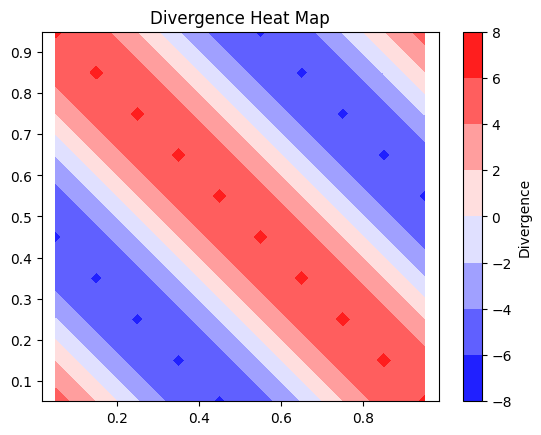

In [28]:
# Visualize the divergence
X, Y = pressure_mesh_grid
plt.contourf(X, Y, div, cmap='bwr')
plt.colorbar(label='Divergence')
plt.title('Divergence Heat Map')
plt.axis('equal')
plt.show()

### Gradient test

In [18]:
grad_x, grad_y = my_grid.compute_gradient()

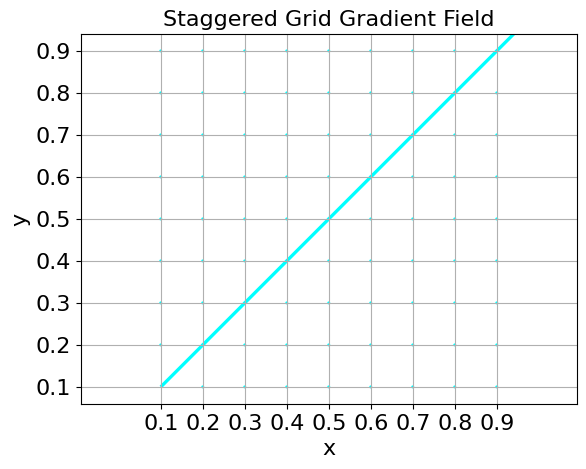

In [20]:
'''
Gradient operator verification: calculate the gradient of the pressure field
'''
X, Y = vorticity_mesh_grid
# Interpolate the x-component of the velocity field to the pressure mesh grid
grad_x_interpolated = (grad_x[:-1, :] + grad_x[1:, :]) / 2
grad_y_interpolated = (grad_y[:, :-1] + grad_y[:, 1:]) / 2


plt.quiver(X, Y, grad_x_interpolated, grad_y_interpolated, color='cyan', scale=1, scale_units='xy')
plt.title('Staggered Grid Gradient Field', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(np.round(X[0, :], 2), fontsize=16)
plt.yticks(np.round(Y[:, 0], 2), fontsize=16)
plt.axis('equal')
plt.grid(axis='both')

### Laplacian test

In [24]:
'''
Laplacian operator verification
'''


'\nLaplacian operator verification\n'

### Nonlinear advection test

In [25]:
'''
Nonlinear advection operator verification
'''

'\nNonlinear advection operator verification\n'